In [2]:
# import common libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
# load data from csv

data = pd.read_csv('cereal.csv', index_col = 'name') #ensure file is in same location as notebook or add path

In [4]:
# head

data.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [5]:
# shape

data.shape

(77, 15)

In [6]:
# columns

for i in data.columns:
    print(i)

mfr
type
calories
protein
fat
sodium
fiber
carbo
sugars
potass
vitamins
shelf
weight
cups
rating


In [7]:
# info

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 100% Bran to Wheaties Honey Gold
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mfr       77 non-null     object 
 1   type      77 non-null     object 
 2   calories  77 non-null     int64  
 3   protein   77 non-null     int64  
 4   fat       77 non-null     int64  
 5   sodium    77 non-null     int64  
 6   fiber     77 non-null     float64
 7   carbo     77 non-null     float64
 8   sugars    77 non-null     int64  
 9   potass    77 non-null     int64  
 10  vitamins  77 non-null     int64  
 11  shelf     77 non-null     int64  
 12  weight    77 non-null     float64
 13  cups      77 non-null     float64
 14  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(2)
memory usage: 9.6+ KB


In [8]:
# describe

data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [9]:
# number of observations

len(data)

77

In [10]:
# descriptives for calories

data.calories.describe()

count     77.000000
mean     106.883117
std       19.484119
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: calories, dtype: float64

In [11]:
# unique manufacturers

data.mfr.unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [12]:
# manufacturer value counts

data.mfr.value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

In [13]:
# pivot table for calories by manufacturer

data.pivot_table('calories', 'mfr')

,calories
mfr,
A,100.000000
G,111.363636
K,108.695652
N,86.666667
P,108.888889
Q,95.000000
R,115.000000


In [14]:
# pivot table for calories by manufacturer by type

data.pivot_table('calories', 'mfr', 'type')

type,C,H
mfr,,
A,NaN,100.0
G,111.363636,NaN
K,108.695652,NaN
N,84.000000,100.0
P,108.888889,NaN
Q,94.285714,100.0
R,115.000000,NaN


In [15]:
# select variables of interest - including cost

data2 = pd.DataFrame(data, columns = ['calories', 'mfr', 'cups', 'rating', 'cost'])
data2

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,NaN
100% Natural Bran,120,Q,1.00,33.983679,NaN
All-Bran,70,K,0.33,59.425505,NaN
All-Bran with Extra Fiber,50,K,0.50,93.704912,NaN
Almond Delight,110,R,0.75,34.384843,NaN
...,...,...,...,...,...
Triples,110,G,0.75,39.106174,NaN
Trix,110,G,1.00,27.753301,NaN
Wheat Chex,100,R,0.67,49.787445,NaN


In [16]:
# select multiple variables - but not cost

data[['calories', 'mfr', 'cups', 'rating']]

,calories,mfr,cups,rating
name,,,,
100% Bran,70,N,0.33,68.402973
100% Natural Bran,120,Q,1.00,33.983679
All-Bran,70,K,0.33,59.425505
All-Bran with Extra Fiber,50,K,0.50,93.704912
Almond Delight,110,R,0.75,34.384843
...,...,...,...,...
Triples,110,G,0.75,39.106174
Trix,110,G,1.00,27.753301
Wheat Chex,100,R,0.67,49.787445


In [17]:
# set cost to $3.50

data2['cost'] = 3.5
data2

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,3.5
100% Natural Bran,120,Q,1.00,33.983679,3.5
All-Bran,70,K,0.33,59.425505,3.5
All-Bran with Extra Fiber,50,K,0.50,93.704912,3.5
Almond Delight,110,R,0.75,34.384843,3.5
...,...,...,...,...,...
Triples,110,G,0.75,39.106174,3.5
Trix,110,G,1.00,27.753301,3.5
Wheat Chex,100,R,0.67,49.787445,3.5


In [18]:
# create random values for cost

np.random.seed(56)

costs = np.random.uniform(low = 2.5, high = 4.5, size = (len(data2))).round(2)

data2['cost'] = costs
data2

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,4.47
100% Natural Bran,120,Q,1.00,33.983679,3.17
All-Bran,70,K,0.33,59.425505,3.85
All-Bran with Extra Fiber,50,K,0.50,93.704912,2.89
Almond Delight,110,R,0.75,34.384843,3.21
...,...,...,...,...,...
Triples,110,G,0.75,39.106174,3.37
Trix,110,G,1.00,27.753301,3.31
Wheat Chex,100,R,0.67,49.787445,3.17


In [19]:
# create new boolean where costs > 3.5

data2['cost2'] = data2['cost'] > 3.5

data2

,calories,mfr,cups,rating,cost,cost2
name,,,,,,
100% Bran,70,N,0.33,68.402973,4.47,True
100% Natural Bran,120,Q,1.00,33.983679,3.17,False
All-Bran,70,K,0.33,59.425505,3.85,True
All-Bran with Extra Fiber,50,K,0.50,93.704912,2.89,False
Almond Delight,110,R,0.75,34.384843,3.21,False
...,...,...,...,...,...,...
Triples,110,G,0.75,39.106174,3.37,False
Trix,110,G,1.00,27.753301,3.31,False
Wheat Chex,100,R,0.67,49.787445,3.17,False


In [20]:
# let's use `del` to delete `cost2` - we don't need it

del data2['cost2']
data2


,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,4.47
100% Natural Bran,120,Q,1.00,33.983679,3.17
All-Bran,70,K,0.33,59.425505,3.85
All-Bran with Extra Fiber,50,K,0.50,93.704912,2.89
Almond Delight,110,R,0.75,34.384843,3.21
...,...,...,...,...,...
Triples,110,G,0.75,39.106174,3.37
Trix,110,G,1.00,27.753301,3.31
Wheat Chex,100,R,0.67,49.787445,3.17


In [21]:
# we can index our original dataset using this value, as well

data3 = data2[data2['cost']>3.5]

data3.head()

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,4.47
All-Bran,70,K,0.33,59.425505,3.85
Apple Cinnamon Cheerios,110,G,0.75,29.509541,4.13
Bran Chex,90,R,0.67,49.120253,4.25
Cinnamon Toast Crunch,120,G,0.75,19.823573,4.17


In [22]:
print(data2['cost']>3.5)

name
100% Bran                     True
100% Natural Bran            False
All-Bran                      True
All-Bran with Extra Fiber    False
Almond Delight               False
                             ...  
Triples                      False
Trix                         False
Wheat Chex                   False
Wheaties                     False
Wheaties Honey Gold          False
Name: cost, Length: 77, dtype: bool


In [23]:
data.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [24]:
data.loc['All-Bran']

mfr                 K
type                C
calories           70
protein             4
fat                 1
sodium            260
fiber             9.0
carbo             7.0
sugars              5
potass            320
vitamins           25
shelf               3
weight            1.0
cups             0.33
rating      59.425505
Name: All-Bran, dtype: object

In [25]:
data.iloc[2]

mfr                 K
type                C
calories           70
protein             4
fat                 1
sodium            260
fiber             9.0
carbo             7.0
sugars              5
potass            320
vitamins           25
shelf               3
weight            1.0
cups             0.33
rating      59.425505
Name: All-Bran, dtype: object

In [26]:
# use brackets instead of parentheses as shown in module video to prevent later problems
data.loc[['All-Bran', 'Almond Delight'], 'fiber']

name
All-Bran          9.0
Almond Delight    1.0
Name: fiber, dtype: float64

In [27]:
# use brackets instead of parentheses as shown in module video to prevent later problems
data.loc[['All-Bran', 'Almond Delight'], ['fiber', 'mfr']]

,fiber,mfr
name,,
All-Bran,9.0,K
Almond Delight,1.0,R


## Create per cup amounts

#### Student Practice
Pause the video and try to perform the following tasks on the `cereal` dataset. Then check your answers as I walk through the solutions. 

**Exercise:** Create four new variables called:

* `calPerCup` - calories per cup
* `proPerCup` - protein per cup
* `fatPerCup` - fat per cup
* `sugPerCup` - sugar per cup

All created by taking the variable and dividing by cups (e.g., calories/cups)

In [46]:
calPerCup= data['calories'] / data['cups']
proPerCup= data['calories'] / data['protein']
fatPerCup= data['calories'] / data['fat']
sugPerCup= data['calories'] / data['sugars']

**Exercise:** Create a scatterplot of `calories` by `calPerCup`.  You can use Matplotlib or Seaborn.

<AxesSubplot:xlabel='name'>

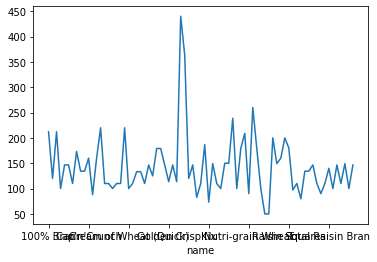

In [44]:
import matplotlib
calPerCup.plot()

**Exercise:** Which cereal has the highest calories per cup?

In [54]:
calPerCup.groupby('name').max()

name
100% Bran                    212.121212
100% Natural Bran            120.000000
All-Bran                     212.121212
All-Bran with Extra Fiber    100.000000
Almond Delight               146.666667
                                ...    
Triples                      146.666667
Trix                         110.000000
Wheat Chex                   149.253731
Wheaties                     100.000000
Wheaties Honey Gold          146.666667
Length: 77, dtype: float64

## Sorting

**Exercise:** Sort `data` by index.

In [58]:
data.sort_index()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445


**Exercise:** Sort the columns alphabetically.

In [65]:
data.reindex(sorted(data.columns), axis =1)

,calories,carbo,cups,fat,fiber,mfr,potass,protein,rating,shelf,sodium,sugars,type,vitamins,weight
name,,,,,,,,,,,,,,,
100% Bran,70,5.0,0.33,1,10.0,N,280,4,68.402973,3,130,6,C,25,1.0
100% Natural Bran,120,8.0,1.00,5,2.0,Q,135,3,33.983679,3,15,8,C,0,1.0
All-Bran,70,7.0,0.33,1,9.0,K,320,4,59.425505,3,260,5,C,25,1.0
All-Bran with Extra Fiber,50,8.0,0.50,0,14.0,K,330,4,93.704912,3,140,0,C,25,1.0
Almond Delight,110,14.0,0.75,2,1.0,R,-1,2,34.384843,3,200,8,C,25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,110,21.0,0.75,1,0.0,G,60,2,39.106174,3,250,3,C,25,1.0
Trix,110,13.0,1.00,1,0.0,G,25,1,27.753301,2,140,12,C,25,1.0
Wheat Chex,100,17.0,0.67,1,3.0,R,115,3,49.787445,1,230,3,C,25,1.0


In [74]:
# sort by different columns
data.sort_values('calories', ascending=False)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.5,0.67,30.313351
Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.0,1.00,37.136863
Muesli Raisins; Peaches; & Pecans,R,C,150,4,3,150,3.0,16.0,11,170,25,3,1.0,1.00,34.139765
Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.5,1.00,28.592785
Just Right Fruit & Nut,K,C,140,3,1,170,2.0,20.0,9,95,100,3,1.3,0.75,36.471512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912


In [84]:
# sort by multiple columns
data.sort_values(['calories','mfr'], ascending=(False, True))

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.5,0.67,30.313351
Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.0,1.00,37.136863
Muesli Raisins; Peaches; & Pecans,R,C,150,4,3,150,3.0,16.0,11,170,25,3,1.0,1.00,34.139765
Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.5,1.00,28.592785
Just Right Fruit & Nut,K,C,140,3,1,170,2.0,20.0,9,95,100,3,1.3,0.75,36.471512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912


In [101]:
# sum for all variables
data.sum()

mfr         NQKKRGKGRPQGGGGRKKGKNKGRKKKPKPPGPPPQGPKKGQGARR...
type        CCCCCCCCCCCCCCCCCCCCHCCCCCCCCCCCCCCCCCCCCCCHCC...
calories                                                 8230
protein                                                   196
fat                                                        78
sodium                                                  12295
fiber                                                   165.7
carbo                                                  1124.0
sugars                                                    533
potass                                                   7398
vitamins                                                 2175
shelf                                                     170
weight                                                  79.28
cups                                                    63.22
rating                                            3285.259284
dtype: object

In [92]:
# sum of calories
data['calories'].sum()

8230

**Exercise:** Calculate the standard deviation by column.

In [99]:
# std for all variables
data.std()

C:\Users\bfergu32\AppData\Local\Temp/ipykernel_22168/3917293124.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


calories    19.484119
protein      1.094790
fat          1.006473
sodium      83.832295
fiber        2.383364
carbo        4.278956
sugars       4.444885
potass      71.286813
vitamins    22.342523
shelf        0.832524
weight       0.150477
cups         0.232716
rating      14.047289
dtype: float64

In [95]:
# std of calories
data['calories'].std()

19.48411905682084

<AxesSubplot:>

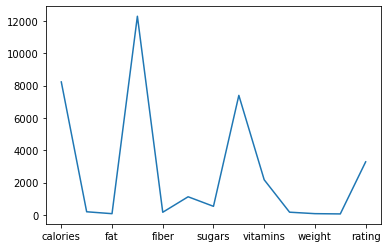

In [110]:
# sum by observation
# the output here is non useful - only for illustrative purposes

sum1= data.sum()
sum1=sum1.drop('mfr')
sum1=sum1.drop('type')
sum1.plot()

Some methods are not direct stats - but use them